![AIRBNB](https://www.stevenridercpa.au/wp-content/uploads/2022/09/airbnb-tax.jpeg)

# Airbnb - Price Prediction
-------

## Table of Contents

1. [Introduction](##Introduction)
    - [Problem Statement](###Problem-Statement)
    - [Objective](###Objective)
    - [Dataset Overview](###Dataset-Overview)
2. [Setup](##Setup)
2. [Data Loading and Exploration](##Data-Loading-and-Exploration)
    - [Loading the Dataset](###Loading-the-Dataset)
    - [Exploratory Data Analysis (EDA)](###Exploratory-Data-Analysis-(EDA))
    - [Data Preprocessing](###Data-Preprocessing)
3. [Baseline Model](##Baseline-Model)
    - [Preparing the Inputs](###Preparing-the-Inputs)
    - [Model Architecture](###Model-Architecture)
    - [Model Compilation](###Model-Compilation)
    - [Model Training](###Model-Training)
4. [Hyperparameter Tuning](##Hyperparameter-Tuning)
    - [Grid Search Setup](###Grid-Search-Setup)
    - [Execution of Grid Search](###Execution-of-Grid-Search)
    - [Analysis of Grid Search Results](###Analysis-of-Grid-Search-Results)
5. [Participation in Kaggle Competition](##Participation-in-Kaggle-Competition)
    - [Submission Preparation](###Submission-Preparation)
    - [Submission to Kaggle](###Submission-to-Kaggle)
6. [Conclusion](##Conclusion)

### Problem Statement

A dataset containing information of accommodations published in AirBnB with their respective prices is presented. The size of the train dataset is approximately 1.5 Gb, and 0.5 Gb for the test dataset. This has 84 predictor variables that can be used as they see fit.

The objective is to assign the correct price to the listed accommodations. 

In addition to the dataset, you are provided with this notebook containing the data loading script and a baseline model corresponding to a feed forward architecture.


### Objective

The primary objective of this project is to develop a predictive model capable of accurately estimating the rental prices of accommodations listed on AirBnB. By leveraging a dataset consisting of various attributes and historical pricing data of listed accommodations, we aim to build a model that minimizes the error in price prediction. 

The success of this endeavor will be evaluated based on the Mean Absolute Error (MAE) metric, with the goal of achieving an MAE of less than 70 points (based on the [participation in Kaggle](##Participation-in-Kaggle-Competition)). This objective aligns with the criteria set forth in the associated Kaggle competition, which serves as a structured platform for benchmarking the performance of our model against others.

Several tasks have been outlined to aid in the accomplishment of this objective:

- Conduct thorough [exploratory data analysis](###Exploratory-Data-Analysis-(EDA)) to understand the underlying patterns and characteristics of the data.
- [Preprocess the data](###Data-Preprocessing) to ensure it is well-suited for training machine learning models.
- Establish a [baseline model](##Baseline-Model) using a feed-forward neural network architecture, against which further models and techniques can be compared.
- Engage in a methodical [grid search](###Grid-Search-Setup) to identify the optimal hyperparameters for our model, utilizing tools such as [Weights and Biases](https://wandb.ai/site) for systematic exploration and logging.
- Incorporate advanced techniques including [Batch Normalization](###Batch-Normalization) and [Gradient Normalization/Clipping](###Gradient-Normalization-and/or-Gradient-Clipping) to enhance the learning process and stability of the model.
- Continuously evaluate the performance of the model, iterating on the architecture and training process as necessary to inch closer to the desired MAE goal.

By adhering to a structured approach encompassing data exploration, preprocessing, model building, hyperparameter tuning, and advanced technique implementation, we aspire to develop a robust model that stands up to the competition standards and possibly exceeds them, thereby moving closer to solving the real-world problem of accurate price prediction in the peer-to-peer accommodation rental domain.


### Dataset Overview

The dataset provided for this project comprises information pertaining to accommodations listed on AirBnB, captured across 85 different attributes or columns. This dataset is housed within a Pandas DataFrame and totals 326,287 entries, extending from index 0 to 326,286. Below is a high-level summary of the dataset's structure and contained attributes:

- **Entries:** 326,287
- **Attributes:** 85
- **Target Variable:** `Price`
- **Data Types:** 
    - Integer: 2
    - Float: 31
    - Object: 52
- **Memory Usage:** 211.6+ MB

#### Attribute Highlights

1. **Identifier Attributes:**
   - `id`: Unique identifier for each listing.
   - `Host ID`: Unique identifier for each host.

2. **Textual Descriptions:**
   - `Name`, `Summary`, `Description`: Textual descriptions of the listing.
   - `Neighborhood Overview`, `Notes`, `Transit`: Additional textual information about the listing’s neighborhood and transit options.

3. **Host Information:**
   - `Host Name`, `Host Since`, `Host Location`: Information regarding the host.
   - `Host Response Time`, `Host Response Rate`: Host’s responsiveness metrics.

4. **Location and Property Attributes:**
   - `Street`, `Neighbourhood`, `City`, `State`, `Country`: Location-related attributes.
   - `Property Type`, `Room Type`: Descriptors of the property type and room type.

5. **Accommodation Features:**
   - `Accommodates`, `Bathrooms`, `Bedrooms`, `Beds`: Attributes indicating the accommodation capacity and facilities.
   - `Amenities`: List of amenities provided.

6. **Pricing and Booking Information:**
   - `Price`, `Security Deposit`, `Cleaning Fee`: Pricing-related information.
   - `Guests Included`, `Extra People`, `Minimum Nights`, `Maximum Nights`: Booking-related attributes.

7. **Availability and Review Metrics:**
   - `Availability 30`, `Availability 60`, `Availability 90`, `Availability 365`: Availability metrics over different time horizons.
   - `Number of Reviews`, `Review Scores Rating`, `Reviews per Month`: Review-related metrics.

8. **Miscellaneous:**
   - `Features`: Other features of the listing.
   - `Geolocation`: Geographical coordinates of the listing.

This dataset presents a rich and diverse set of attributes, offering a substantial foundation upon which to build predictive models aimed at accurately estimating rental prices for AirBnB listings. The extensive variety of data attributes spans textual descriptions, categorical variables, numerical metrics, and date-related information, providing a well-rounded basis for a comprehensive exploratory data analysis (EDA) and subsequent model development.

> The memory usage of this dataset is significant, amounting to over 211.6 MB, which necessitates efficient data handling and processing techniques to ensure smooth and effective model training and evaluation.


## Setup

### Imports

In this project, we will be leveraging the powerful capabilities of [Keras](https://keras.io/) to build and train our machine learning models. Keras is an open-source software library that provides a Python interface for artificial neural networks. It acts as an interface for the TensorFlow library, allowing for high-level building and training of models.

To ensure that the necessary dependencies are correctly installed and managed throughout the project, we'll be utilizing [Conda](https://docs.conda.io/en/latest/) as our package manager. Conda is an open-source package management and environment management system that runs on Windows, macOS, and Linux.

The `environment.yml` file located in the root of the project directory contains the list of all necessary packages and their respective versions required for this project. This file will allow us to create a Conda environment with the specified dependencies, ensuring a consistent environment across different setups.


In [1]:
# Standard Libraries
import os
import random

# Data Manipulation
import numpy as np
import pandas as pd
from collections import Counter

# Machine Learning Libraries
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, StandardScaler

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
import imageio
import skimage
import skimage.io
import skimage.transform
from PIL import Image

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Dense,
    Embedding,
    Flatten,
    Concatenate,
    BatchNormalization,
    Dropout,
)
from tensorflow.keras.callbacks import (
    EarlyStopping
)
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, SGD

2023-11-20 11:14:14.149229: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 11:14:14.170439: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9241] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 11:14:14.170459: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 11:14:14.171032: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1516] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 11:14:14.174626: I tensorflow/core/platform/cpu_feature_guar

Setting environment variables for the project

In [2]:
pd.set_option("display.max_columns", None)  # Display all columns of a dataframe

# set cuda lib path (probably not needed, this is for my local machine)
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/opt/cuda"
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

### Setting the Random Seed for Reproducibility

For any machine learning experiment, reproducibility is crucial. Setting a random seed ensures that the random numbers generated by our code are the same across different runs, making the results reproducible. In this project, the random seed is set for PyTorch.

In [3]:
SEED = 117
# Set the seed for generating random numbers
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Data Loading and Exploration
In this section, we delve into the initial phase of our project where we load the dataset into our environment and perform an exploratory data analysis (EDA) to better understand the nature and characteristics of the data we are dealing with.

### Loading the Dataset
The dataset for this project is conveniently provided and is located at the `/data` directory. Since this dataset it's too large to be uploaded to GitHub, it is not included in the repository. However, it can be downloaded from the [Kaggle competition page](https://www.kaggle.com/competitions/obligatorio-deep-learning-2023).


In [4]:
TRAIN_PATH = "./data/public_train_data.csv"
SUBMISSION_PATH = "./data/private_data_to_predict.csv"
train_df = pd.read_csv(TRAIN_PATH)
submission_df = pd.read_csv(SUBMISSION_PATH)

### Exploratory Data Analysis (EDA)

The Exploratory Data Analysis (EDA) is a vital step that helps in understanding the intricacies of the data, spotting any anomalies, and uncovering patterns that could be instrumental in building a precise predictive model. The steps involved in the EDA for this dataset are outlined as follows:

1. **Summary Statistics**
   Acquiring summary statistics will provide insights into the central tendency and dispersion of the numerical attributes.

2. **Data Type Analysis**
   A review of the data types of each attribute to ensure they are in the correct format for analysis and modeling.

3. **Missing Values Assessment**
   Identifying and addressing missing values across different attributes to ensure completeness of the data.

4. **Categorical Variable Analysis**
   Exploring the unique values and counts of categorical variables to understand the distribution across different categories.

5. **Correlation Analysis**
   Analyzing the correlation between numerical variables, especially with respect to the target variable `Price`, to understand any strong relationships that might exist.

6. **Text Data Overview**
   Reviewing textual data to understand the quality and potential feature extraction opportunities it presents.

Through a detailed EDA, the aim is to garner insights that will be pivotal in guiding the subsequent data preprocessing and model building stages, thereby ensuring a solid foundation for developing an accurate price prediction model.


> Since we have too many attributes, we will only explore a subset of them. First we are going to remove (manually) the attributes that are not useful for our analysis (in my opinion). Then, we will select a subset of attributes that we will explore in detail.

In [5]:
columns_to_drop = [
    "Last Scraped",
    "Experiences Offered",
    "Thumbnail Url",
    "Medium Url",
    "Picture Url",
    "XL Picture Url",
    "Host URL",
    "Host ID",
    "Host Thumbnail Url",
    "Host Name",
    "Host Since",
    "Host Location",
    "Host About",
    "Host Response Time",
    "Host Thumbnail Url",
    "Host Picture Url",
    "Host Listings Count",
    "Host Total Listings Count",
    "Host Verifications",
    "Calendar Updated",
    "Calendar last Scraped",
    "First Review",
    "Last Review",
]
train_df.drop(columns_to_drop, axis=1, inplace=True)

#### Summary Statistics

Summary statistics provide a high-level overview of the numerical attributes within the dataset, offering insights into the central tendency, dispersion, and shape of the distribution of the dataset, sans any influence of the other attributes. These statistics are crucial for understanding the typical behavior of the dataset, identifying outliers, and observing the distribution and spread of the data points across different attributes.

Key Components of Summary Statistics:

1. **Count:** The number of non-null entries for each attribute.
2. **Mean:** The average value of each attribute, providing a measure of central tendency.
3. **Standard Deviation (std):** A measure of the amount of variation or dispersion of a set of values.
4. **Minimum (min) and Maximum (max):** The smallest and largest values in each attribute, respectively.
5. **25th, 50th (median), and 75th Percentiles:** These values provide a summary of the distribution of values, where for instance, 25% of the data points are below the 25th percentile.

A tabulated summary of these statistics can be procured for each numerical attribute in the dataset. This tabulated format allows for a clear, concise view of the dataset's overall behavior, and aids in identifying any potential anomalies or outliers that may require further investigation.

Furthermore, summary statistics play a vital role in the data preprocessing stage, where understanding the distribution of data is crucial for tasks such as normalization, handling outliers, and feature scaling. By thoroughly analyzing these summary statistics, one can make informed decisions on the necessary preprocessing steps to enhance the model's performance in subsequent stages of the project.


In [6]:
summary_statistics = train_df.describe()

# Displaying the summary statistics
print(summary_statistics)

                  id  Host Response Rate       Latitude      Longitude  \
count  326287.000000       250845.000000  326287.000000  326287.000000   
mean   163143.000000           93.408264      38.042816     -15.323924   
std     94191.087979           17.536835      22.910029      70.101677   
min         0.000000            0.000000     -38.224427    -123.218712   
25%     81571.500000           98.000000      38.923154     -73.968081   
50%    163143.000000          100.000000      42.304549       0.090277   
75%    244714.500000          100.000000      50.863658      12.342749   
max    326286.000000          100.000000      55.994889     153.637837   

        Accommodates      Bathrooms       Bedrooms           Beds  \
count  326244.000000  325300.000000  325873.000000  325693.000000   
mean        3.270764       1.239482       1.358072       1.909587   
std         2.037446       0.574784       0.921763       1.453753   
min         1.000000       0.000000       0.000000       

#### Data Type Analysis

Analyzing the data types of each attribute is a crucial step in understanding the kind of data you are dealing with. This analysis helps in ensuring that each attribute is formatted correctly, which is essential for both data preprocessing and modeling stages of the project.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326287 entries, 0 to 326286
Data columns (total 63 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              326287 non-null  int64  
 1   Name                            326018 non-null  object 
 2   Summary                         315651 non-null  object 
 3   Space                           228792 non-null  object 
 4   Description                     326188 non-null  object 
 5   Neighborhood Overview           192513 non-null  object 
 6   Notes                           130729 non-null  object 
 7   Transit                         200649 non-null  object 
 8   Access                          177108 non-null  object 
 9   Interaction                     169193 non-null  object 
 10  House Rules                     195763 non-null  object 
 11  Host Response Rate              250845 non-null  float64
 12  Host Acceptance 

#### Missing Values Assessment

Assessing missing values is a critical step in the data exploration process. Missing data can lead to incorrect or biased analyses and conclusions. Identifying the presence and extent of missing values in the dataset is crucial to decide on the appropriate handling strategies.

Implementing appropriate strategies to handle missing values is crucial to ensure the robustness and accuracy of the predictive model. The strategy chosen can significantly affect the model's performance and the insights derived from the data analysis.


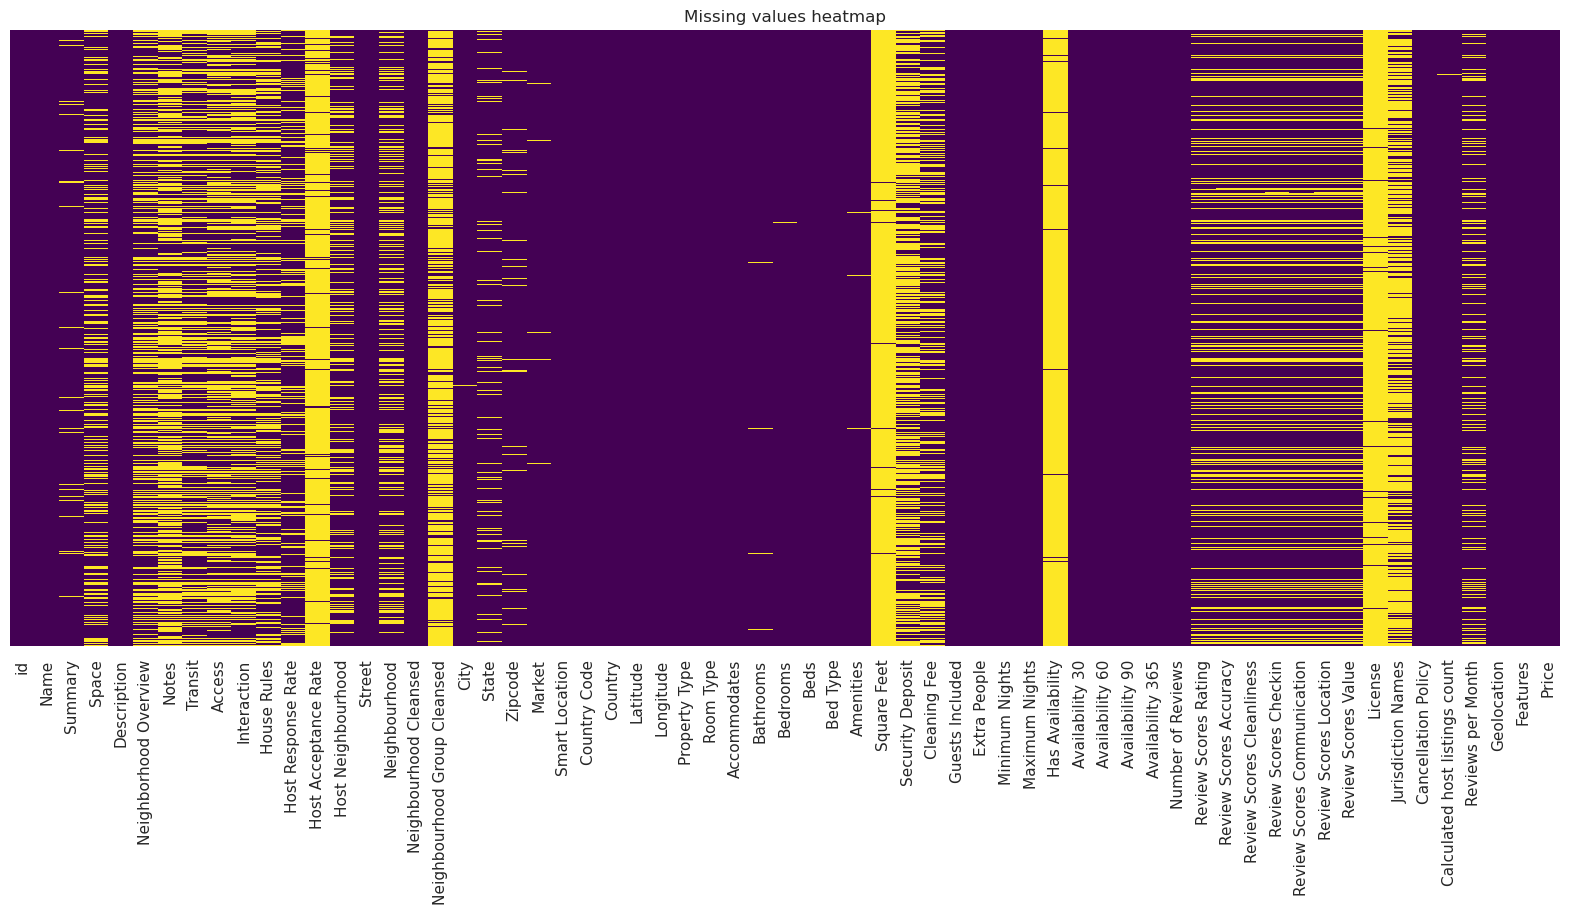

In [8]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a heatmap to visualize the missing values
plt.figure(figsize=(20, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing values heatmap")
plt.show()

In [9]:
DROP_NULL_THRESHOLD = 30

# Calculate the percentage of missing values for each column
missing_values_percentage = train_df.isnull().mean() * 100

# Identify columns with missing values higher than the threshold
columns_with_high_missing_values = missing_values_percentage[
    missing_values_percentage > DROP_NULL_THRESHOLD
].index

# print the columns with high missing values
for column in columns_with_high_missing_values:
    print(f"{column}: {missing_values_percentage[column]:.2f}% missing values")

Neighborhood Overview: 41.00% missing values
Notes: 59.93% missing values
Transit: 38.51% missing values
Access: 45.72% missing values
Interaction: 48.15% missing values
House Rules: 40.00% missing values
Host Acceptance Rate: 91.53% missing values
Neighbourhood: 30.29% missing values
Neighbourhood Group Cleansed: 79.07% missing values
Square Feet: 97.55% missing values
Security Deposit: 58.28% missing values
Cleaning Fee: 36.20% missing values
Has Availability: 98.08% missing values
License: 97.00% missing values
Jurisdiction Names: 72.60% missing values


#### Categorical Variable Analysis

Categorical variable analysis is essential for understanding the distinct categories within attributes and their counts, which can provide insights into the data distribution and potential feature engineering opportunities.

Key Steps:

1. **Unique Value Identification:**
   - Determine the unique values and their counts within each categorical attribute.

2. **Visualization:**
   - Use bar charts or pie charts to visualize the distribution of categorical variables.

3. **Potential Encoding Strategies:**
   - Identify appropriate encoding techniques like one-hot encoding or label encoding for handling categorical variables during the data preprocessing stage.


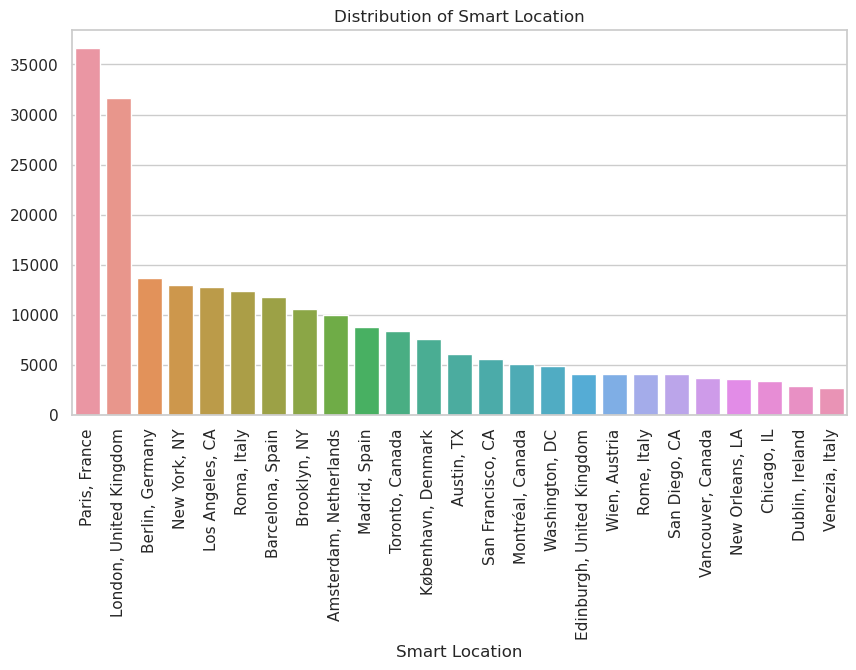

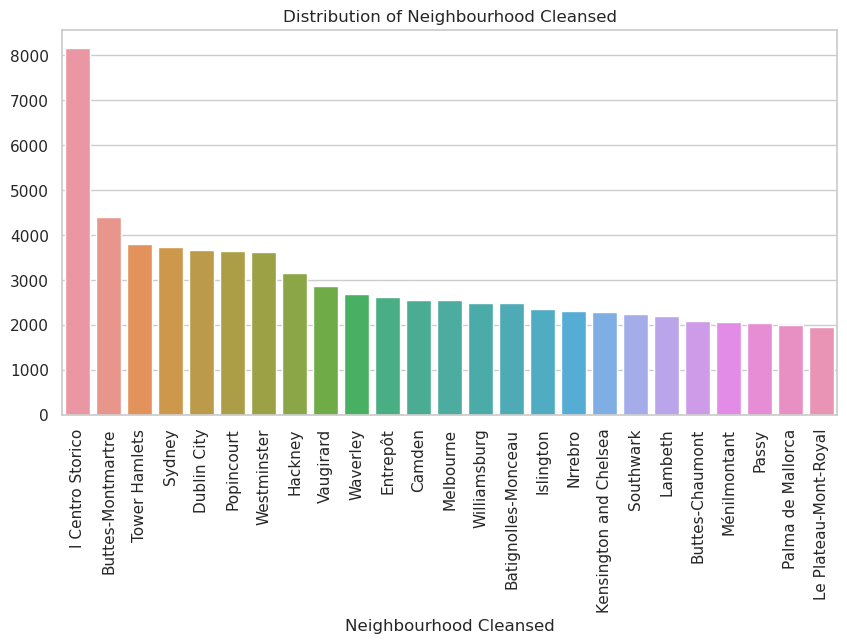

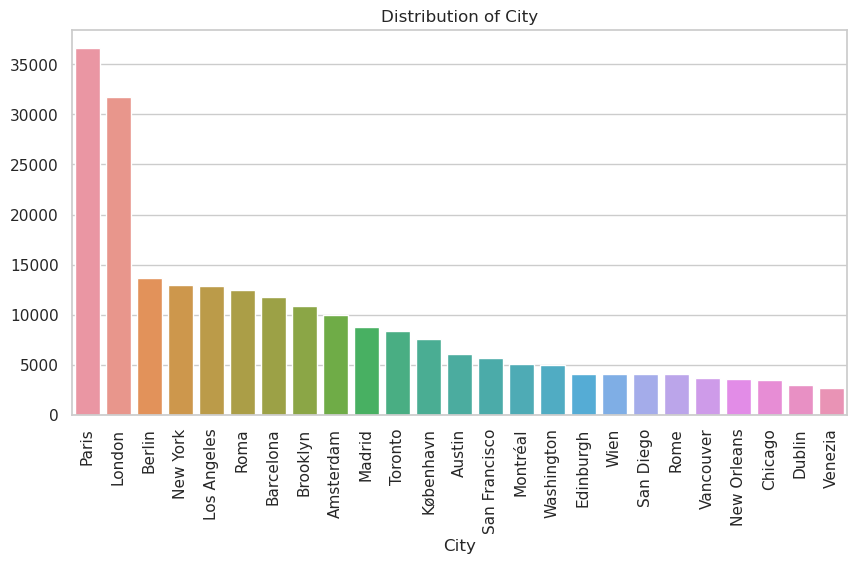

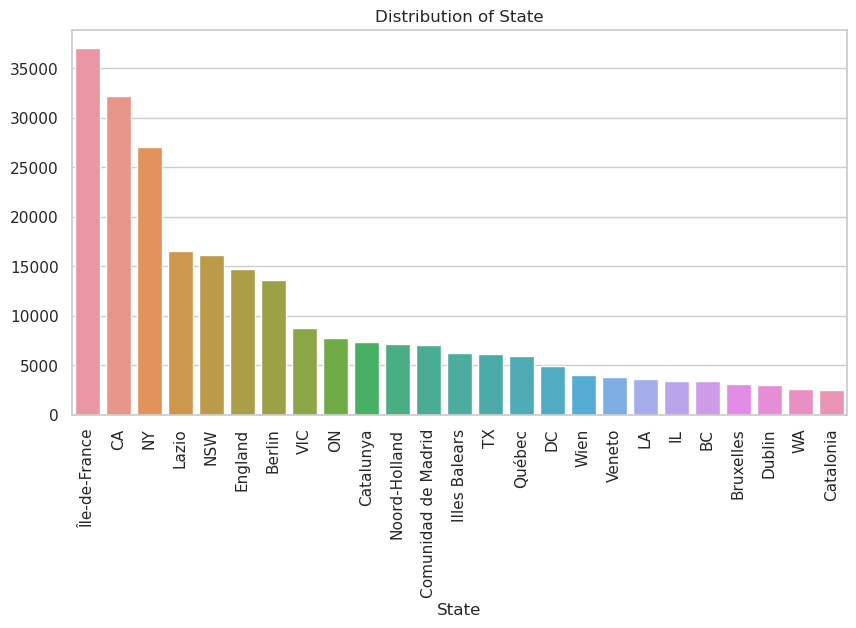

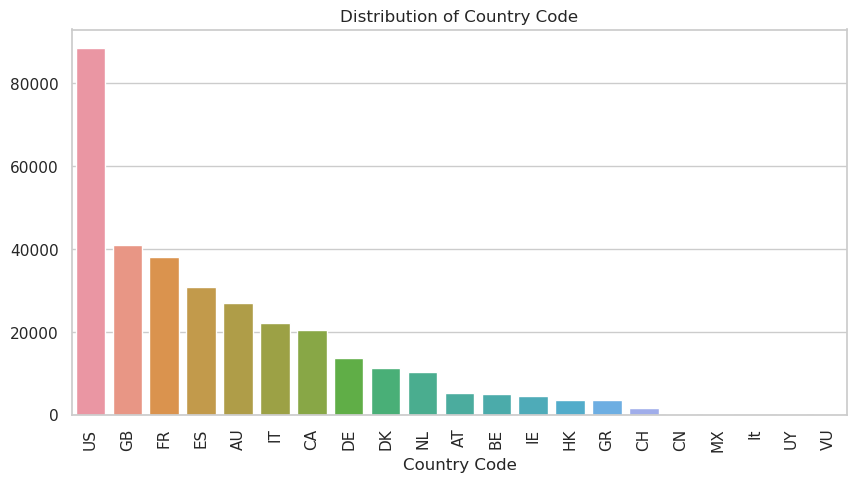

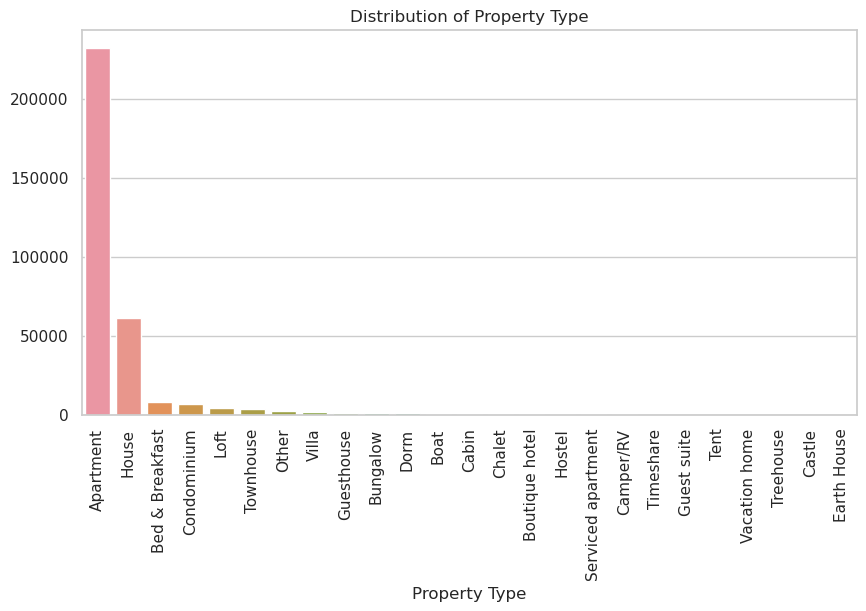

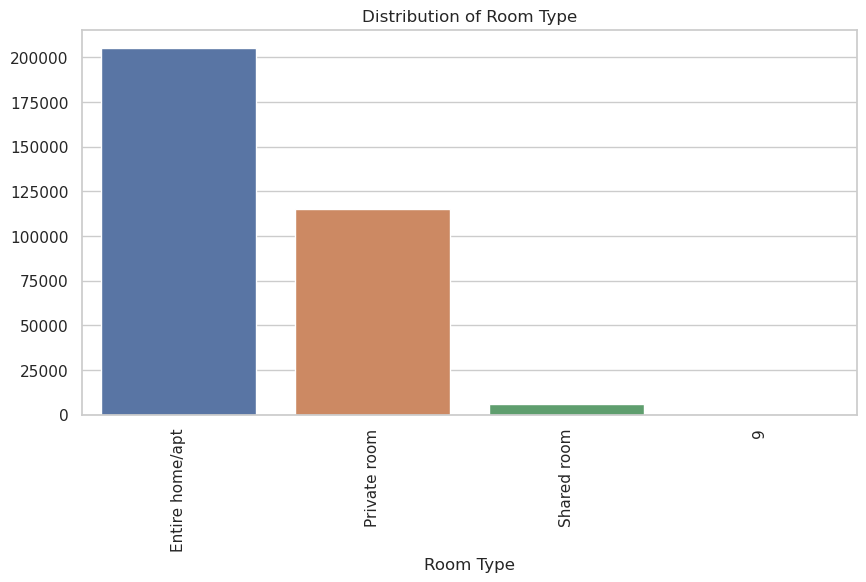

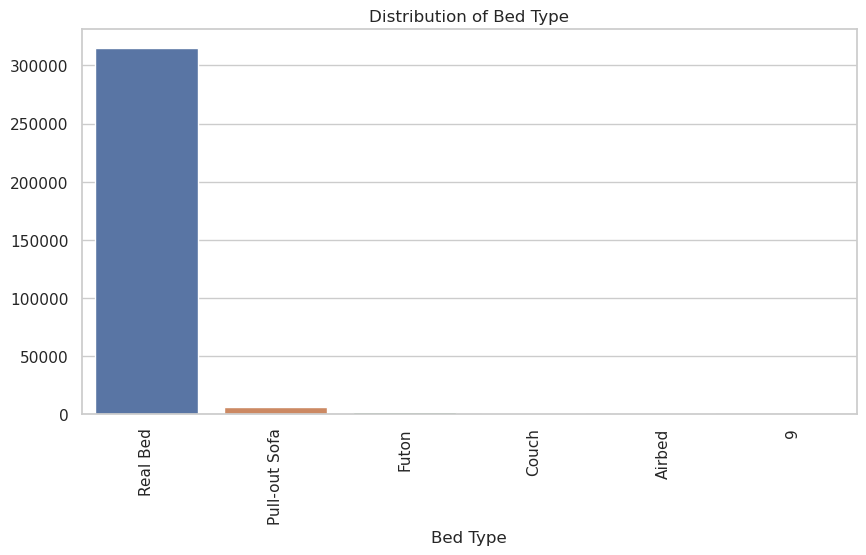

In [10]:
SHOW_TOP_N = 25
categorical_attributes = [
    "Smart Location",
    "Neighbourhood Cleansed",
    "City",
    "State",
    "Country Code",
    "Property Type",
    "Room Type",
    "Bed Type",
]
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Loop through each categorical attribute and display the count of unique values
for attribute in categorical_attributes:
    # Get the count of each unique value
    value_counts = train_df[attribute].value_counts()

    # Display the count of unique values using a bar chart
    plt.figure(figsize=(10, 5))
    sns.barplot(x=value_counts.index[:SHOW_TOP_N], y=value_counts.values[:SHOW_TOP_N])
    plt.title(f"Distribution of {attribute}")
    plt.xticks(rotation=90)  # Rotate X-axis labels for better readability, if necessary
    plt.show()

In [11]:
# Count the number of missing values for each categorical attribute
missing_values_categorical = train_df[categorical_attributes].isnull().sum()

# Output the count of missing values
print(missing_values_categorical)

Smart Location                1
Neighbourhood Cleansed        0
City                        283
State                     31295
Country Code                  1
Property Type                 7
Room Type                     0
Bed Type                      0
dtype: int64


##### Amerites
This specific column is a list of amenities that the accommodation offers separeted by commas. We are going to create a new column for each amenity and assign a 1 if the accommodation offers it or a 0 if it doesn't.

In [12]:
# Splitting the comma-separated values in the 'Amenities' column
amenities_split = train_df["Amenities"].str.split(",", expand=True)

In [13]:
# Creating an empty dictionary to hold the count of each amenity
amenity_counts = {}

# Iterating through each row and column of 'amenities_split'
for index, row in amenities_split.iterrows():
    for amenity in row:
        if amenity and amenity not in amenity_counts:
            amenity_counts[amenity] = 1
        elif amenity:
            amenity_counts[amenity] += 1

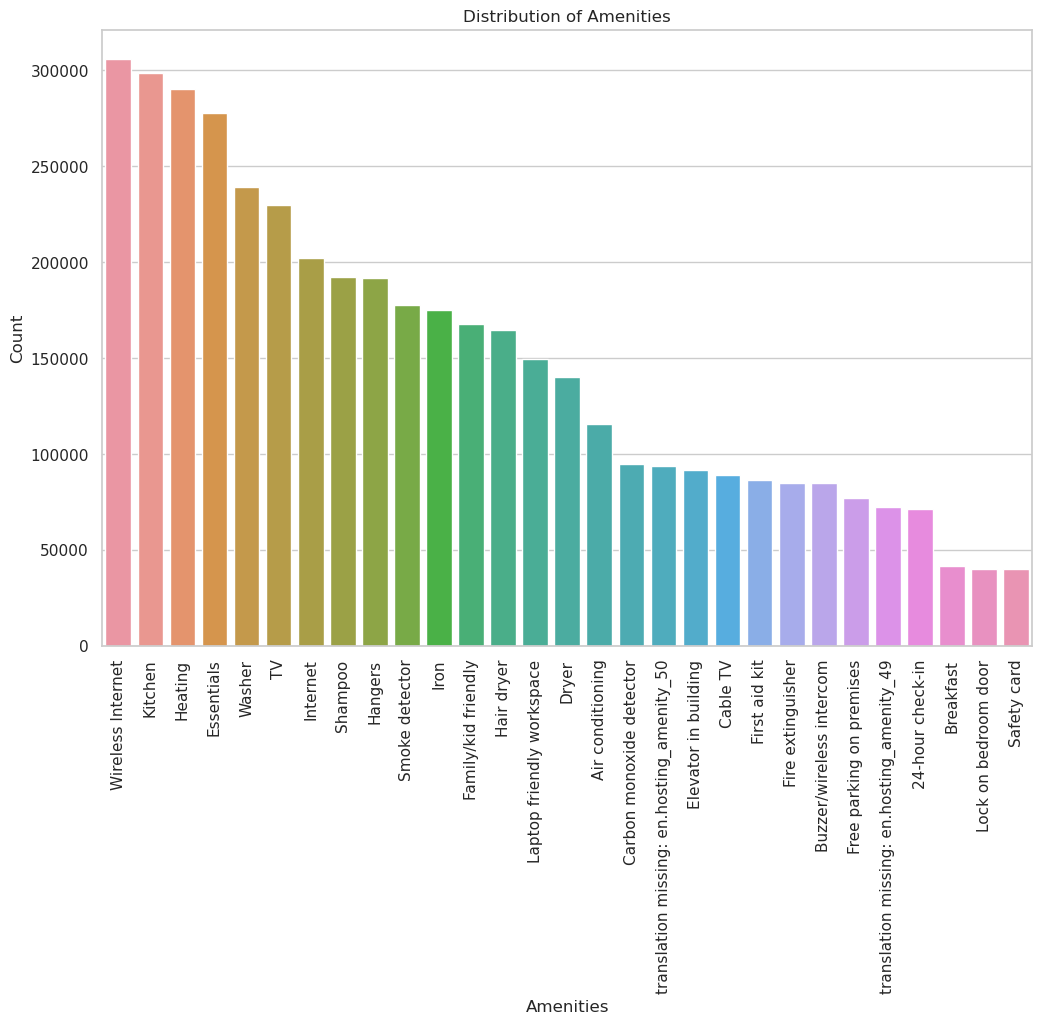

In [14]:
# Converting the 'amenity_counts' dictionary to a pandas Series for easier plotting
amenity_counts_series = pd.Series(amenity_counts)

# Sorting the counts in descending order for better visualization
amenity_counts_series = amenity_counts_series.sort_values(ascending=False)

# Creating a bar plot of the amenity counts
plt.figure(figsize=(12, 8))
sns.barplot(x=amenity_counts_series.index[:30], y=amenity_counts_series.values[:30])
plt.title("Distribution of Amenities")
plt.xlabel("Amenities")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.show()

In [15]:
CORRELATION_THRESHOLD = 0.1

# Select only numeric columns
df_numeric = train_df.select_dtypes(include=["float64", "int64"])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Get correlation of all features with 'price'
price_correlation = correlation_matrix["Price"].sort_values(ascending=False)

# Filter out the features with a correlation above a certain threshold, for example 0.3
important_numerical_features = price_correlation[
    abs(price_correlation) >= CORRELATION_THRESHOLD
]

In [16]:
print(important_numerical_features)

Price               1.000000
Cleaning Fee        0.739040
Security Deposit    0.394896
Accommodates        0.373885
Bedrooms            0.361354
Beds                0.293338
Extra People        0.274710
Bathrooms           0.260185
Guests Included     0.192998
Square Feet         0.111586
Name: Price, dtype: float64


#### Correlation Analysis

Analyzing the correlation between numerical variables, especially with respect to the target variable `Price`, is integral to understanding any strong relationships that might exist. Correlation analysis provides insight into the linear relationships between variables, which is crucial for feature selection and predictive modeling.

Visualizing correlations through heatmaps or scatter plots can provide a clear, intuitive view of the relationships between variables, making it easier to identify patterns and potential issues that might require further investigation.

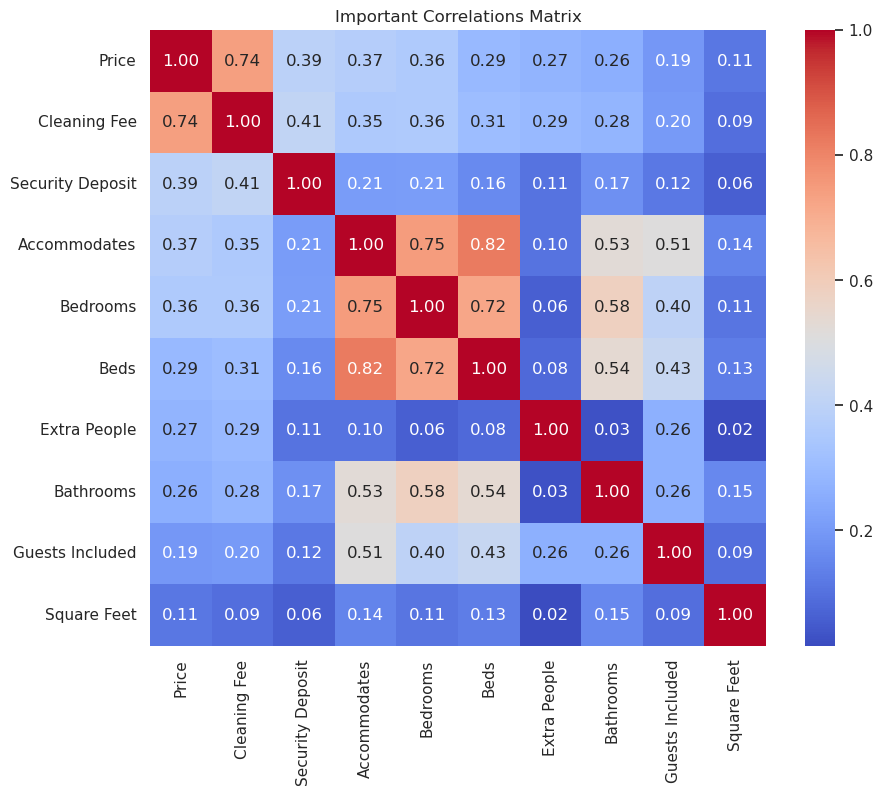

In [17]:
important_variables = important_numerical_features.index
# Create a sub-matrix of the correlation matrix with only the important variables
important_corr_matrix = train_df[important_variables].corr()

sns.set(style="white")

# Creating a heatmap to visualize the important correlations
plt.figure(figsize=(10, 8))
sns.heatmap(important_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Important Correlations Matrix")
plt.show()

#### Text Data Overview

In [18]:
plain_text_attributes = [
    "Name",
    "Summary",
    "Space",
    "Description",
    "Neighborhood Overview",
    "Notes",
    "Transit",
    "Access",
    "Interaction",
    "House Rules",
]
text_stats = train_df[plain_text_attributes].describe()
print(text_stats)

                       Name  \
count                326018   
unique               317641   
top     Home away from home   
freq                     38   

                                                  Summary  \
count                                              315651   
unique                                             304914   
top     My place is good for couples, solo adventurers...   
freq                                                  122   

                                                    Space  \
count                                              228792   
unique                                             221045   
top     This gorgeous apartment is excellently designe...   
freq                                                   76   

                                              Description  \
count                                              326188   
unique                                             320639   
top     My place is good for couples, solo advent

### Data Preprocessing

Data preprocessing is a critical step in the machine learning pipeline. It involves cleaning and transforming raw data into a format that can be used to train machine learning models effectively. The objective is to create high-quality data that boosts the performance of models by reducing potential sources of error and bias. Here's an overview of the key steps involved in data preprocessing:

1. **Handling Missing Values:**
   - Identify and fill or drop missing values to ensure a complete dataset. Strategies may include mean imputation, median imputation, mode imputation, or utilizing algorithms that handle missing values like K-Nearest Neighbors.

2. **Encoding Categorical Variables:**
   - Convert categorical variables into a numerical format through encoding techniques like one-hot encoding, label encoding, or binary encoding.

3. **Text Preprocessing:**
   - For textual data, perform cleaning, tokenization, stemming/lemmatization, and vectorization to convert text into a format suitable for machine learning.

4. **Data Splitting:**
   - Split the data into training, validation, and testing sets to evaluate the performance of models accurately.

5. **Outlier Detection:**
    - Identify and handle outliers which can adversely affect model performance.

Each of these steps requires careful consideration and a good understanding of the data and the problem at hand. The preprocessing steps taken can significantly affect the outcome of the final models, and therefore, a well-thought-out preprocessing strategy is crucial for building robust and high-performing machine learning models.


#### Picking attributes for the model

In [19]:
numerical_attributes = (
    important_numerical_features.index.tolist()
)  # based on correlation
numerical_attributes.remove("Price")

categorical_attributes = categorical_attributes  # based on EDA
categorical_attributes.remove(
    "City"
)  # removed beacuse it has NaN values and Smart Location has the same information (and populated)
categorical_attributes.remove("State")  # same as above

text_attributes = ["Name", "Summary", "Space"]

coordenate_attributes = [
    "Latitude",
    "Longitude",
]  # why not? lat and long are numerical attributes and they are correlated with price

train_df = train_df[
    numerical_attributes
    + categorical_attributes
    + ["Amenities"]
    + text_attributes
    + coordenate_attributes
    + ["Price"]
]
train_df.dropna(subset=["Price"], inplace=True)

submission_df = submission_df[
    ["id"]
    + numerical_attributes
    + categorical_attributes
    + ["Amenities"]
    + text_attributes
    + coordenate_attributes
]

#### Handling Missing Values

##### Numerical Variables

In our dataset, there are a few columns with a substantial amount of missing values that need addressing to ensure the robustness and accuracy of our future models. The columns of interest are:

1. **Square Feet:** 
   - Missing Rate: 97.55%
   - This column has a high rate of missing values, which could be due to the lack of available data or it wasn't applicable for certain listings. Given the high missing rate, imputing values might introduce a lot of noise or bias. However, the fact that the square footage is missing could be informative in itself.

2. **Security Deposit:** 
   - Missing Rate: 58.28%
   - The missing values in this column could be indicative of listings that do not require a security deposit, or it might be data that wasn't collected or provided.

3. **Cleaning Fee:** 
   - Missing Rate: 36.20%
   - Similar to the Security Deposit column, missing values here could be due to listings that do not have a cleaning fee or missing data collection.

Proposed Strategies:

1. **Square Feet, Security Deposit and Cleaning Fee:** 
   - I will add a binary "missing" indicator to this column, where `1` indicates a missing value and `0` indicates a non-missing value.
   > I tried to use KNN imputation, but it was too slow.

2. **Other Numerical Variables:**
   - For the remaining numerical variables, we'll use mean imputation to fill in the missing values.

In [20]:
# Adding a missing indicator for Square Feet and Security Deposit

train_df["Square_Feet_Missing"] = train_df["Square Feet"].isnull().astype(int)
train_df["Square Feet"].fillna(0, inplace=True)  # Fill missing values with 0

train_df["Security_Deposit_Missing"] = train_df["Security Deposit"].isnull().astype(int)
train_df["Security Deposit"].fillna(0, inplace=True)  # Fill missing values with 0

train_df["Cleaning_Fee_Missing"] = train_df["Cleaning Fee"].isnull().astype(int)
train_df["Cleaning Fee"].fillna(0, inplace=True)  # Fill missing values with 0


submission_df["Square_Feet_Missing"] = submission_df["Square Feet"].isnull().astype(int)
submission_df["Square Feet"].fillna(0, inplace=True)  # Fill missing values with 0

submission_df["Security_Deposit_Missing"] = (
    submission_df["Security Deposit"].isnull().astype(int)
)
submission_df["Security Deposit"].fillna(0, inplace=True)  # Fill missing values with 0

submission_df["Cleaning_Fee_Missing"] = (
    submission_df["Cleaning Fee"].isnull().astype(int)
)
submission_df["Cleaning Fee"].fillna(0, inplace=True)  # Fill missing values with 0

missing_indicator_attributes = [
    "Square_Feet_Missing",
    "Security_Deposit_Missing",
    "Cleaning_Fee_Missing",
]

In [21]:
# Select columns to impute
columns_to_impute = numerical_attributes
columns_to_impute.remove("Square Feet")
columns_to_impute.remove("Security Deposit")
columns_to_impute.remove("Cleaning Fee")

# Impute missing values with the median of each column
for column in columns_to_impute:
    median_value = train_df[column].median()
    train_df[column].fillna(median_value, inplace=True)
    submission_df[column].fillna(median_value, inplace=True)

##### Categorical Variables

Missing values in categorical variables can introduce bias, lead to misinterpretation, and ultimately, incorrect analysis. Therefore, understanding and appropriately handling missing values is a critical step in preparing our data for analysis or predictive modeling. In our dataset, we have identified a few categorical variables with missing values. The variables and the chosen strategies to handle their missing values are detailed below:

1. **Amenities**:
   The `Amenities` column contains comma-separated values representing various amenities provided by the Airbnb listings. Missing values in this column suggest that the listing does not provide any additional amenities. Hence, we will replace missing values in the `Amenities` column with an empty string ("").

These strategies are selected based on the nature of the data, the context, and the potential impact on the analysis or predictive modeling process. Implementing these strategies will ensure that our dataset is well-prepared for the subsequent steps in our project.


In [22]:
# Handling Missing Values in Amenities column by replacing NaN with empty string
train_df["Amenities"].fillna("", inplace=True)
submission_df["Amenities"].fillna("", inplace=True)

##### Text Variables

In our dataset, we have several text variables that provide descriptive information about the listings. These textual attributes could hold valuable insights for our analysis or predictive modeling. However, missing or null values in these text variables can pose challenges in processing and analyzing them.

To streamline the handling of missing values in these text variables, we have decided to replace any missing or null values with an empty string (`""`). This approach will ensure consistency across our dataset and facilitate easier text processing down the line. Replacing missing text data with an empty string is a straightforward way to handle missing values in textual data and provides a clear indication of the absence of information.

In [23]:
for column in text_attributes:
    train_df[column].fillna("", inplace=True)
    submission_df[column].fillna("", inplace=True)

#### Encoding Categorical Variables

To prepare our categorical data for the deep learning models, we will employ different encoding strategies based on the nature and cardinality of each categorical attribute:

1. **Embedding Layers**:
   - We will utilize embedding layers for the high cardinality categorical attributes. Embedding layers are proficient in transforming categorical data into a continuous representation while preserving the categorical semantics. They are particularly beneficial in the context of deep learning models like DNN and RNN.
   - Attributes to be encoded using embedding layers:
     - `Smart Location`

2. **One-Hot Encoding**:
   - For categorical attributes with a lower number of unique values, one-hot encoding is a straightforward and effective approach. It creates a binary column for each category which is suitable for our model.
   - Attributes to be encoded using one-hot encoding:
     - `Country Code`
     - `Property Type`
     - `Room Type`
     - `Bed Type`

3. **Amenities Attribute Splitting and One-Hot Encoding**:
   - The `Amenities` attribute contains multiple categorical values separated by commas for each observation. We will split these values into individual categories, and then apply one-hot encoding to create binary columns for each unique amenity.
   - This approach will help in capturing the presence or absence of specific amenities for each listing, which could be a significant factor in predicting the price of the listing.

These encoding strategies will help in transforming the categorical data into a suitable numerical format for our deep learning models, ensuring that the categorical semantics are well-represented in the model.


In [24]:
# 1. Prepare for Embedding Layers
encoder = LabelEncoder()
# Concatenate the 'Smart Location' columns from both dataframes (in case there are new locations in the submission dataframe)
all_locations = pd.concat([train_df["Smart Location"], submission_df["Smart Location"]])
# Fit the encoder on all locations
encoder.fit(all_locations)

# Now transform the 'Smart Location' columns in train_df and submission_df
train_df["Smart_Location_encoded"] = encoder.transform(train_df["Smart Location"])
submission_df["Smart_Location_encoded"] = encoder.transform(
    submission_df["Smart Location"]
)

In [25]:
number_of_locations = len(all_locations.unique())

In [26]:
# 1. Prepare for Embedding Layers
neighbourhood_encoder = LabelEncoder()
# Concatenate the 'Smart Location' columns from both dataframes (in case there are new locations in the submission dataframe)
all_neighbourhood = pd.concat([train_df["Neighbourhood Cleansed"], submission_df["Neighbourhood Cleansed"]])
# Fit the encoder on all locations
encoder.fit(all_neighbourhood)

# Now transform the 'Smart Location' columns in train_df and submission_df
train_df["Neighbourhood_Cleansed_encoded"] = encoder.transform(train_df["Neighbourhood Cleansed"])
submission_df["Neighbourhood_Cleansed_encoded"] = encoder.transform(
    submission_df["Neighbourhood Cleansed"]
)

In [27]:
number_of_neighbourhood = len(all_neighbourhood.unique())

In [28]:
# 2. One-Hot Encoding for specified columns
one_hot_cols = ["Country Code", "Property Type", "Room Type", "Bed Type"]
train_df = pd.get_dummies(
    train_df, columns=one_hot_cols, prefix=one_hot_cols, drop_first=True, dtype=int
)
submission_df = pd.get_dummies(
    submission_df, columns=one_hot_cols, prefix=one_hot_cols, drop_first=True, dtype=int
)

In [29]:
# save the one-hot encoded columns
one_hot_attributes = [
    col for col in train_df.columns if col.startswith(tuple(one_hot_cols))
]

In [30]:
# 3. Splitting and One-Hot Encoding for Amenities attribute
# Splitting the amenities into a list of amenities
train_df["Amenities"] = train_df["Amenities"].str.split(",")
submission_df["Amenities"] = submission_df["Amenities"].str.split(",")

# Applying one-hot encoding to the list of amenities using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
train_amenities_encoded = mlb.fit_transform(train_df["Amenities"])
submission_amenities_encoded = mlb.transform(submission_df["Amenities"])

# Creating dataframes from the encoded amenities data
# Creating dataframes from the encoded amenities data
train_amenities_df = pd.DataFrame(
    train_amenities_encoded,
    columns=["Amenities_" + col for col in mlb.classes_],
    index=train_df.index,
)
submission_amenities_df = pd.DataFrame(
    submission_amenities_encoded,
    columns=["Amenities_" + col for col in mlb.classes_],
    index=submission_df.index,
)

# The rest of your code remains the same...

# Concatenating the encoded amenities dataframes with the original dataframes
train_df = pd.concat([train_df, train_amenities_df], axis=1)
submission_df = pd.concat([submission_df, submission_amenities_df], axis=1)

#### Text Preprocessing

1. **Concatenating Text Attributes**:
   - Merge all text attributes into a single column.
   - Limit the text in each column to a specified `MAX_LEN` before merging to avoid excessively long text strings.

2. **Tokenization**:
   - Split the merged text into individual words, which will enable further processing such as stopword removal and lemmatization.

3. **Stopword Removal**:
   - Remove common words (e.g., "the", "a", "an") that do not carry much meaning and are often removed in the preprocessing step.

4. **Lemmatization**:
   - Reduce words to their root or base form (e.g., "running" to "run").

5. **Vectorization (Word2Vec)**:
   - Convert words into vectors of numbers to allow for analysis and modeling. Word2Vec is a popular method that can capture semantic relationships between words.

The above steps aim to prepare the text data for further analysis and modeling, particularly when looking to use this data in conjunction with numerical and categorical data for Deep Learning models. Each step of the preprocessing will clean and transform the text data into a more usable format for the downstream tasks.


In [31]:
# Step 1: Concatenating Text Attributes
MAX_LEN = 50

# Limit text in each column to MAX_LEN
for column in text_attributes:
    train_df[column] = train_df[column].str.slice(0, MAX_LEN)
    submission_df[column] = submission_df[column].str.slice(0, MAX_LEN)

# Concatenate text columns into a single column
train_df["merged_text"] = train_df[text_attributes].apply(lambda x: " ".join(x), axis=1)
submission_df["merged_text"] = submission_df[text_attributes].apply(
    lambda x: " ".join(x), axis=1
)

In [32]:
# lowercase all text
train_df["merged_text"] = train_df["merged_text"].str.lower()
submission_df["merged_text"] = submission_df["merged_text"].str.lower()

In [33]:
# Step 2: Tokenization
import nltk

# Tokenize the merged_text column
train_df["tokenized_text"] = train_df["merged_text"].apply(nltk.word_tokenize)
submission_df["tokenized_text"] = submission_df["merged_text"].apply(nltk.word_tokenize)

In [34]:
# Step 3: Stopword Removal
from nltk.corpus import stopwords

# Load stopwords
stop_words = set(stopwords.words("english"))

# Remove stopwords from the tokenized text
train_df["text_without_stopwords"] = train_df["tokenized_text"].apply(
    lambda x: [word for word in x if word.lower() not in stop_words]
)
submission_df["text_without_stopwords"] = submission_df["tokenized_text"].apply(
    lambda x: [word for word in x if word.lower() not in stop_words]
)

In [35]:
# Step 4: Lemmatization
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each word in the text
train_df["lemmatized_text"] = train_df["text_without_stopwords"].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x]
)
submission_df["lemmatized_text"] = submission_df["text_without_stopwords"].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x]
)

In [36]:
VECTOR_SIZE = 100

# Step 5: Vectorization (Word2Vec)
from gensim.models import Word2Vec

# Create Word2Vec model
model = Word2Vec(
    sentences=train_df["lemmatized_text"],
    vector_size=VECTOR_SIZE,
    window=5,
    min_count=1,
    workers=4,
)


def vectorize_text(tokens):
    vector_sum = sum(model.wv[word] for word in tokens if word in model.wv)
    return vector_sum


# Apply vectorization to each row of text data in training and testing datasets
train_df["vectorized_text"] = train_df["lemmatized_text"].apply(vectorize_text)
submission_df["vectorized_text"] = submission_df["lemmatized_text"].apply(
    vectorize_text
)

In [37]:
# some rows have no text, so they are not vectorized
# we are going to fill them with vector (VECTOR_SIZE) of zeros

train_non_vector_indices = train_df.index[
    train_df["vectorized_text"].apply(type) != np.ndarray
]
submission_non_vector_indices = submission_df.index[
    submission_df["vectorized_text"].apply(type) != np.ndarray
]

train_df.loc[train_non_vector_indices, "vectorized_text"] = train_df.loc[
    train_non_vector_indices, "vectorized_text"
].apply(lambda x: np.zeros(VECTOR_SIZE))

submission_df.loc[submission_non_vector_indices, "vectorized_text"] = submission_df.loc[
    submission_non_vector_indices, "vectorized_text"
].apply(lambda x: np.zeros(VECTOR_SIZE))

#### Outlier

I have opted not to exclude outliers from the dataset as these values represent genuine data points. This decision aligns with perspectives shared on [Stack Exchange](https://stats.stackexchange.com/questions/298551/will-removing-outliers-improve-my-predictive-model), suggesting that removing outliers can sometimes lead to the loss of valuable information, which could potentially improve the predictive accuracy of a model.


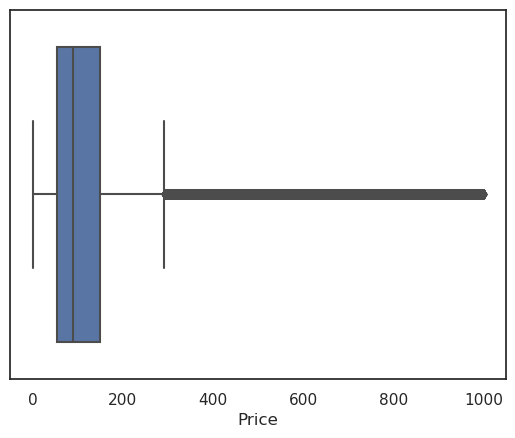

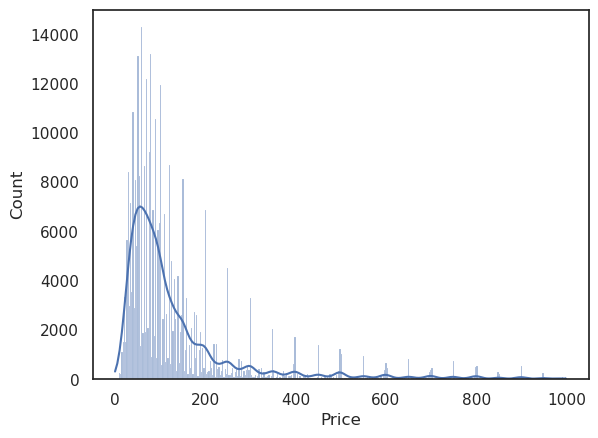

In [38]:
sns.boxplot(x=train_df["Price"])
plt.show()

# To see a more detailed distribution
sns.histplot(train_df["Price"], kde=True)
plt.show()

#### Handling missing columns in the test dataset

In [39]:
# Get missing columns in the submission set
missing_cols = set(train_df.columns) - set(submission_df.columns)

# Add a missing column in submission set with default value equal to 0
for c in missing_cols:
    submission_df[c] = 0

## Baseline Model


### Preparing the Inputs

In this section, we set up various input layers, each designed to handle distinct data types and structures in our dataset:

1. **Numerical Attributes Input**: Handles the processing of straightforward numerical data, capturing quantitative aspects of our dataset.

2. **Missing Indicator Attributes Input**: Dedicated to identifying and managing missing values in the data, ensuring overall data integrity.

3. **One-Hot Encoding Attributes Input**: Transforms categorical data into a one-hot encoded format, making it easier for the model to process non-numerical information.

4. **Amenities Attributes Input**: Tailored to manage the amenities data, this layer plays a crucial role in detailed analysis and insights.

5. **Smart Location Embedding**: Incorporates an embedding layer for 'Smart Location' data, converting this attribute into a format that is meaningful and easier for the model to process.

6. **Coordinates Attributes Input**: Processes geographical data, such as coordinates, adding spatial context to the model's understanding.

7. **Word2Vec Vectorized Text Input**: Manages the text data vectorized using Word2Vec, ensuring the model can effectively interpret and learn from textual content.


In [40]:
EMBEDDING_DIMENSION = 512

# Numerical attributes
numerical_input = Input(shape=(len(numerical_attributes),), name="numerical_input")

# Missing indicator attributes
missing_indicator_input = Input(
    shape=(len(missing_indicator_attributes),), name="missing_indicator_input"
)

# One hot encoding attributes
one_hot_input = Input(shape=(len(one_hot_attributes),), name="one_hot_input")

# Amenities attributes
amenities_input = Input(
    shape=(len(train_amenities_df.columns),), name="amenities_input"
)

# Embedding for 'Smart Location'
smart_location_input = Input(shape=(1,), name="smart_location_input")
smart_location_embedding = Embedding(
    input_dim=number_of_locations,
    output_dim=EMBEDDING_DIMENSION,
    name="smart_location_embedding",
)(smart_location_input)
smart_location_flat = Flatten()(smart_location_embedding)

neighbourhood_cleansed_input = Input(shape=(1,), name="neighbourhood_cleansed_input")
neighbourhood_cleansed_embedding = Embedding(
    input_dim=number_of_neighbourhood,
    output_dim=EMBEDDING_DIMENSION,
    name="neighbourhood_cleansed_embedding",
)(neighbourhood_cleansed_input)
neighbourhood_cleansed_flat = Flatten()(neighbourhood_cleansed_embedding)

# Coordinates attributes
coordinates_input = Input(shape=(len(coordenate_attributes),), name="coordinates_input")

# Word2Vec Vectorized Text
vectorized_text_input = Input(shape=(VECTOR_SIZE,), name="vectorized_text_input")


all_inputs = [
    numerical_input,
    missing_indicator_input,
    one_hot_input,
    amenities_input,
    smart_location_input,
    neighbourhood_cleansed_input,
    coordinates_input,
    vectorized_text_input,
]

2023-11-20 11:15:39.915149: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:913] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-20 11:15:39.931842: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:913] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-20 11:15:39.932007: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:913] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### Model Architecture

The model architecture leverages a combination of wide and deep branches to efficiently process various types of inputs. Here's a breakdown of the approach:

- **Wide Branch**: This part of the model directly concatenates simpler features like numerical attributes, missing indicators, and one-hot encoded data. It's designed to capture straightforward relationships without complex transformations.

- **Deep Branches**: These are dedicated to more complex inputs requiring deeper processing, like embedded locations and vectorized text. Each input is fed through dense layers, regularized with dropout, and normalized with batch normalization.

- **Combination and Processing**: The wide and deep branches are then concatenated. Sequential dense layers are added, with dropout and batch normalization applied between them for regularization and normalization, respectively.

- **Output Layer**: The final output is a single dense layer with a ReLU activation function, tailored for price prediction.

This architecture offers a blend of simplicity for easily interpretable features and depth for more complex representations, making it suitable for a diverse set of inputs.

> One of the requirements for this work it's to use [Batch Normalization](https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/). 

In [41]:
def get_layers(deep_neuron_units, neurons_per_layer, activation_function, dropout_rate):

    # Wide branch
    wide_branch = Concatenate()([numerical_input, missing_indicator_input, one_hot_input, amenities_input])

    # Deep branch - Sequentially add dense layers for each input that requires deep processing
    deep_branches = []
    for input_tensor, units in zip(
            [smart_location_flat, neighbourhood_cleansed_flat , coordinates_input, vectorized_text_input],
            [deep_neuron_units, deep_neuron_units, deep_neuron_units, deep_neuron_units]
    ):
        branch = Dense(units, activation=activation_function)(input_tensor)
        branch = Dropout(dropout_rate)(branch)  # Regularization
        branch = BatchNormalization()(branch)  # Normalize the activations
        deep_branches.append(branch)

    # Combine the deep branches
    deep_branch = Concatenate()(deep_branches)

    # Final model
    combined = Concatenate()([wide_branch, deep_branch])

    for i in range(len(neurons_per_layer)):
        combined = Dense(
            units=neurons_per_layer[i],
            activation=activation_function,
        )(combined)
        if i != len(neurons_per_layer) - 1:
            combined = Dropout(dropout_rate)(combined)
            combined = BatchNormalization()(combined) 

    output = Dense(1, activation='relu')(combined)  # Price prediction

    return all_inputs, output


### Model Compilation

The model compilation step is crucial in preparing the model for training. It involves specifying the optimizer, learning rate, and loss function. Here's how it's set up:

- **Optimizer Selection**: The model supports either Adam or SGD optimizers, with an added feature of gradient clipping. Gradient clipping is a technique to prevent exploding gradients, as recommended by [Machine Learning Mastery](https://machinelearningmastery.com/how-to-avoid-exploding-gradients-in-neural-networks-with-gradient-clipping/). It limits the size of the gradient during backpropagation to maintain stable training.

- **Model Configuration**: After defining the optimizer, the model is compiled with the chosen loss function. The metrics Mean Absolute Error (MAE) and Mean Squared Error (MSE) are used for monitoring performance.

This setup ensures that the model is optimized for accurate and stable learning, addressing potential issues like exploding gradients.

In [42]:
def get_model(layers, output_layer, optimizer, learning_rate, clip_value, loss):
    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(
            learning_rate=learning_rate, clipvalue=clip_value
        )
    elif optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(
            learning_rate=learning_rate, clipvalue=clip_value
        )

    model = Model(inputs=layers, outputs=output_layer)

    model.compile(optimizer=optimizer, loss=loss, metrics=["mae", "mse"])

    return model

### Model Training

Model training is a critical phase where the neural network learns from the data. Here's an overview of the process:

- **Data Preparation**: The function `get_x_y` processes the DataFrame to generate the input features (X) and target values (y). It handles various data types, including numerical, categorical, and text data.

- **Model Initialization and Configuration**: The model is initialized with parameters such as layer architecture, activation functions, and dropout rates, configured dynamically using Weights & Biases (wandb).

- **Training Process**: The model is trained using the `fit` method. It employs callbacks for monitoring (WandbCallback) and early stopping to prevent overfitting. The training uses a configurable number of epochs, batch size, and validation split. `max_queue_size` and `workers` parameters manage the loading of data, beneficial for parallelizing data loading and processing.

- **Error Handling**: The training function includes exception handling to log and gracefully exit in case of errors.

This approach ensures a flexible, monitored, and efficient training process, adapting to various configurations and dataset complexities.


In [43]:
def get_x_y(df):
    X1 = df[numerical_attributes].values
    X2 = df[missing_indicator_attributes].values
    X3 = df[one_hot_attributes].values
    X4 = df[train_amenities_df.columns.tolist()].values
    X5 = df["Smart_Location_encoded"].values
    X6 = df["Neighbourhood_Cleansed_encoded"].values
    X7 = df[coordenate_attributes].values

    # Convert these sequences to a list
    X8_list = df["vectorized_text"].tolist()

    # Now convert the padded sequences to a tensor
    X8_tensor = tf.convert_to_tensor(X8_list, dtype=tf.float32)

    X = [X1, X2, X3, X4, X5, X6, X7, X8_tensor]

    y = df["Price"].values

    return X, y

In [44]:
import traceback
import sys
import wandb

EPOCHS = 200


def run_train():
    try:
        with wandb.init(config=None, project=PROJECT, entity=ENTITY):
            config = wandb.config
            print(config)
            # input and output layers
            input_layer, output_layer = get_layers(
                config.deep_neuron_units,
                config.neurons_per_layer,
                config.activation_function,
                config.dropout_rate,
            )
            # get X and y
            X_train, y_train = get_x_y(train_df)
            # get model
            model = get_model(
                input_layer,
                output_layer,
                config.optimizer,
                config.learning_rate,
                config.clip_value,
                config.loss,
            )
            # clear session (cache)
            tf.keras.backend.clear_session()
            # callbacks
            wandb_callback = wandb.keras.WandbCallback()
            early_stopping = EarlyStopping(
                monitor="val_loss",
                patience=10,
                restore_best_weights=True,
            )
            # fit model
            model.fit(
                X_train,
                y_train,
                epochs=EPOCHS,
                batch_size=config.batch_size,
                validation_split=0.2,
                callbacks=[wandb_callback, early_stopping],
                max_queue_size=3,
                workers=8,
            )
    except Exception as e:
        # exit gracefully, so wandb logs the problem
        print(traceback.print_exc(), file=sys.stderr)
        exit(1)

## Hyperparameter Tuning


### Grid Search Setup

Hyperparameter tuning is essential for optimizing model performance. We use [Weights & Biases](https://wandb.ai/) (wandb) for this purpose, setting up a sweep configuration. Here's an overview:

- **Sweep Configuration**: Defines the hyperparameters to be tuned, including the loss function, batch size, neurons per layer, dropout rate, activation function, optimizer, learning rate, and gradient clipping value. 

- **Bayesian Optimization**: The 'bayes' method is employed for efficient searching through the hyperparameter space, guided by past trial results to make smarter decisions.

- **Metric**: The mean absolute error (MAE) is chosen as the metric to minimize, focusing on average prediction accuracy.

- **Parameter Range**: Each hyperparameter has specified ranges or sets of values. For example, the batch size varies between 32 to 1024, and the learning rate is explored between 0.00005 to 0.002.

- **Weights & Biases**: Wandb provides a robust platform for hyperparameter tuning, offering visualization and logging capabilities. This setup allows for a systematic and informed approach to finding the best model configuration.


In [45]:
sweep_config = {
    "name": "sweep_dreams_are_made_of_this_3",
    "method": "bayes",
    "metric": {"name": "val_mae", "goal": "minimize"},
    "parameters": {
        "loss": {
            "values": ["mae"]
        },
        
        "batch_size": {
            "max": 1024,
            "min": 32,
            "distribution": "int_uniform"
        },
        "deep_neuron_units": {
            "max": 1024,
            "min": 32,
            "distribution": "int_uniform"
        },
        "neurons_per_layer": {
            "values": [
                [512, 256, 128],
                [256, 128, 64],
                [512, 256],
                [256, 128],
                [128, 64],
                [64, 32],
                [64]
            ]
        },
        "dropout_rate": {
            "max": 0.9,
            "min": 0.05,
            "distribution": "uniform"
        },
        "activation_function": {
            "values": ["relu", "tanh"],
            "distribution": "categorical"
        },
        "optimizer": {
            "values": ["adam"],
            "distribution": "categorical"
        },
        "learning_rate": {
            "max": 0.002,
            "min": 0.00005,
            "distribution": "uniform"
        },
        "clip_value": {
            "max": 10,
            "min": 0.01,
            "distribution": "uniform"
        }
    },
}

### Execution of Grid Search

In [46]:
import wandb

wandb.login()

PROJECT = "obligatorio_dl"
ENTITY = "joaquin-vigna"

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: joaquin-vigna (joaquin-vigna-team). Use `wandb login --relogin` to force relogin


In [ ]:
RUNS = 100

SWEEP_ID = wandb.sweep(sweep_config, project=PROJECT, entity=ENTITY)

wandb.agent('', function=run_train, count=RUNS, project=PROJECT, entity=ENTITY)

### Analysis of Grid Search Results

![Grid Search Results](assets/grid_search.png)
![MAE](assets/mae.png)
![VAL MAE](assets/val_mae.png)

The MAE and val_MAE trends are good; both decrease indicating learning. No overfitting is apparent as trends align. Some runs plateau early (early stopping).

You can see the complete results [here](https://wandb.ai/joaquin-vigna/obligatorio_dl/sweeps/k4q58ml3).

### Retrieveng the best model

In [58]:
from tensorflow.keras.models import load_model

# Initialize the wandb API
api = wandb.Api()

# Get the sweep
sweep = api.sweep(f"{ENTITY}/{PROJECT}/sweeps/{SWEEP_ID}")

# # Retrieve the best run
best_run = sweep.best_run()

print("Best Run ID:", best_run.id)
print("Best Run Metrics:", best_run.summary)

best_run.file("model-best.h5").download(replace=True)

# # Load the model
model = load_model("model-best.h5")

wandb: Sorting runs by +summary_metrics.val_mae


Best Run ID: t0ivwt0s
Best Run Metrics: {'_step': 101, 'val_mae': 36.17788314819336, '_runtime': 517.0965733528137, 'mae': 33.95143508911133, 'val_mse': 4927.10302734375, 'val_loss': 36.17788314819336, 'loss': 33.95143508911133, 'graph': {'path': 'media/graph/graph_summary_33b5fbb3238d429a6bea.graph.json', 'size': 5878, '_type': 'graph-file', 'sha256': '33b5fbb3238d429a6beab94bf033f4d13eda9e0d0b27cd36ec564e227bf56784'}, '_wandb': {'runtime': 516}, 'best_epoch': 91, 'best_val_loss': 36.13509750366211, 'mse': 4309.4208984375, 'epoch': 101, '_timestamp': 1700501629.0634513}


## Participation in Kaggle Competition
### Submission Preparation

In [59]:
X_test, _ =  get_x_y(submission_df)

In [60]:
kaggle_results = model.predict(X_test)
test_ids = submission_df['id']
test_ids = np.array(test_ids).reshape(-1,1)
output = np.stack((test_ids, kaggle_results), axis=-1)
output = output.reshape([-1, 2])
df = pd.DataFrame(output)
df.columns = ['id','expected']  
df['expected'] = df['expected'].fillna(0)   
df.to_csv("output_to_submit.csv", index = False, index_label = False)


5023/5023 [==============================] - 6s 1ms/step


### Submission to Kaggle

![kaggle](assets/kaggle2.png)

Achieving a score of ~38 on Kaggle, significantly below the target of 70, indicates a strong performance of the model in the competition. This result demonstrates effective feature engineering, model selection, and hyperparameter tuning, leading to a highly accurate predictive model. The accomplishment showcases the proficiency in applying machine learning techniques to real-world problems, reflecting well on both the model's design and the training approach.

## Conclusion
This journey through machine learning, from data preprocessing to complex model architecture, showcases a deep understanding of AI principles and practical application. The successful Kaggle submission, underscored by a score well below the target, highlights the effectiveness of the chosen methods. The project's progression, including tackling challenges like hyperparameter tuning and model optimization, illustrates a thorough grasp of AI strategies. This endeavor not only achieves its immediate goal but also sets a solid foundation for future explorations and innovations in the field of artificial intelligence.